# K vecinos más cercanos 

El método de los k vecinos más cercanos es uun método de clasificación supervisada, que estima la probabilidad de que un elemento 'X' pertenezca a una clase 'C' a partir de la información proporcionada.
Este método es utilizado para la clasificación de objetos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/home/ikari/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ikari/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ikari/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ikari/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ikari/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate 

In [4]:
dataframe = pd.read_csv('./datasets/vehiculos/original.csv')

In [5]:
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [6]:
# nos devuelve una lista con los 4 tipos de vehículos que tiene
dataframe['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [7]:
# dividimos entre variable objetivo y características
y = dataframe['vehicle_class']
X = dataframe.drop('vehicle_class', axis=1)


In [8]:
# dividimos entre test y entrenamiento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [9]:
X_train

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
794,87.0,41.0,76.0,165.0,67.0,7.0,148.0,45.0,19.0,140.0,171.0,327.0,152.0,72.0,7.0,13.0,188.0,195.0
317,95.0,45.0,105.0,208.0,64.0,10.0,187.0,36.0,22.0,150.0,202.0,520.0,158.0,64.0,7.0,32.0,198.0,211.0
570,105.0,53.0,108.0,206.0,63.0,12.0,222.0,31.0,25.0,168.0,226.0,712.0,201.0,71.0,15.0,35.0,189.0,203.0
750,96.0,40.0,78.0,170.0,58.0,7.0,174.0,38.0,21.0,139.0,197.0,455.0,160.0,68.0,3.0,29.0,191.0,200.0
374,87.0,36.0,53.0,117.0,58.0,4.0,118.0,57.0,17.0,125.0,138.0,205.0,138.0,85.0,9.0,15.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,91.0,37.0,76.0,138.0,55.0,8.0,132.0,51.0,18.0,135.0,157.0,256.0,124.0,69.0,0.0,12.0,191.0,192.0
607,86.0,39.0,62.0,129.0,59.0,6.0,116.0,57.0,17.0,135.0,137.0,203.0,145.0,64.0,7.0,9.0,199.0,204.0
544,88.0,43.0,70.0,177.0,74.0,19.0,152.0,44.0,19.0,143.0,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189.0
643,95.0,43.0,83.0,198.0,69.0,6.0,177.0,36.0,21.0,139.0,189.0,484.0,163.0,68.0,6.0,4.0,196.0,198.0


In [10]:
X_test

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
547,88.0,44.0,70.0,151.0,61.0,8.0,143.0,46.0,18.0,143.0,163.0,311.0,173.0,68.0,7.0,8.0,196.0,203.0
694,100.0,43.0,92.0,197.0,62.0,10.0,180.0,36.0,21.0,143.0,200.0,489.0,153.0,64.0,6.0,9.0,195.0,205.0
559,101.0,56.0,101.0,231.0,72.0,10.0,217.0,31.0,24.0,171.0,232.0,698.0,216.0,72.0,2.0,6.0,187.0,197.0
248,103.0,55.0,103.0,211.0,65.0,11.0,212.0,31.0,24.0,165.0,229.0,673.0,249.0,72.0,5.0,16.0,188.0,196.0
720,91.0,38.0,76.0,172.0,61.0,8.0,167.0,40.0,20.0,134.0,196.0,415.0,145.0,71.0,0.0,28.0,189.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,104.0,54.0,91.0,209.0,67.0,11.0,218.0,31.0,24.0,170.0,223.0,697.0,196.0,74.0,4.0,21.0,187.0,196.0
436,93.0,42.0,64.0,123.0,51.0,7.0,135.0,51.0,18.0,144.0,164.0,262.0,155.0,78.0,16.0,12.0,185.0,185.0
735,86.0,37.0,77.0,144.0,54.0,7.0,154.0,43.0,19.0,127.0,179.0,352.0,145.0,71.0,14.0,13.0,186.0,191.0
63,83.0,42.0,66.0,156.0,67.0,7.0,150.0,45.0,19.0,144.0,174.0,333.0,159.0,78.0,4.0,2.0,182.0,188.0


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # para K=1

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
predicciones = knn.predict(X_test)

In [16]:
# comparamos los valores de test originales de los predecidos
dic = {'vehicle_class_original':y_test, 'vehicle_class_prediccion':predicciones}
pd.DataFrame(dic)

,vehicle_class_original,vehicle_class_prediccion
547,bus,saab
694,saab,opel
559,saab,saab
248,opel,opel
720,opel,saab
...,...,...
481,opel,opel
436,van,van
735,opel,opel
63,bus,bus


In [18]:
# comprobamos la precisión con la matriz de confución.
# la diagonal principal serían los positivos correctos. AL rededor tenemos los falsos negativos
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [19]:
# precisión del modelo: para el bus 82% y van 78% pero para el resto son muy malas
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



In [20]:
# vamos a hacer un sistema para calcular la K más optima (ya que antes hemos puesto k=1) que nos pueda dar una precisión mayor
tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i) # para K irá varianto de 1 a 30
    knn.fit(X_train, y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test)) # añadimos la tasa de error de cada una de las K
    # la que de una tasa de error más baja, será la K optima
    tasa_error

In [21]:
# a simple vista se podría decir que la K optima es K=3
tasa_error

[0.35826771653543305,
 0.3464566929133858,
 0.3188976377952756,
 0.3228346456692913,
 0.33858267716535434,
 0.3346456692913386,
 0.3228346456692913,
 0.33858267716535434,
 0.36220472440944884,
 0.3661417322834646,
 0.35039370078740156,
 0.3661417322834646,
 0.36220472440944884,
 0.38188976377952755,
 0.35039370078740156,
 0.3661417322834646,
 0.3661417322834646,
 0.3700787401574803,
 0.3661417322834646,
 0.3779527559055118,
 0.3661417322834646,
 0.37401574803149606,
 0.37401574803149606,
 0.37401574803149606,
 0.3779527559055118,
 0.38976377952755903,
 0.38188976377952755,
 0.3700787401574803,
 0.37401574803149606]

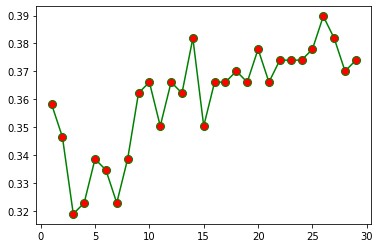

In [27]:
# lo graficamos
valores = range(1,30)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize=8)

In [28]:
# Comprobamos la precisión con K=3
knn = KNeighborsClassifier(n_neighbors=3) # para K=3
knn.fit(X_train, y_train)
predicciones = knn.predict(X_test)
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254

